In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.read_csv('Entertainer - Basic Info.csv')
df2=pd.read_csv('Entertainer - Breakthrough Info.csv')
df3=pd.read_csv('Entertainer - Last work Info.csv')
df1
df2
df3

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN
...,...,...,...
65,Tom Hanks,2016,NaN
66,Tony Bennett,2016,NaN
67,Wayne Newton,2016,NaN
68,Will Smith,2016,NaN


In [6]:
df1.isnull().sum()
df2.isnull().sum()
df3.isnull().sum()

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

In [7]:
#df3.dropna(inplace=True)
df3['Year of Death']=df3['Year of Death'].astype(object)
df3['Year of Death']=df3['Year of Death'].fillna(value='NOt Application')
df3

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NOt Application
1,Angelina Jolie,2016,NOt Application
2,Aretha Franklin,2014,NOt Application
3,Bette Davis,1989,1989.0
4,Betty White,2016,NOt Application
...,...,...,...
65,Tom Hanks,2016,NOt Application
66,Tony Bennett,2016,NOt Application
67,Wayne Newton,2016,NOt Application
68,Will Smith,2016,NOt Application


In [8]:
df1.describe()
df2.describe()
df3.describe()

,Year of Last Major Work (arguable)
count,70.000000
mean,1998.971429
std,22.874561
min,1933.000000
25%,1980.000000
50%,2014.000000
75%,2016.000000
max,2016.000000


In [9]:
df1.dtypes
df2.dtypes
df3.dtypes

Entertainer                           object
Year of Last Major Work (arguable)     int64
Year of Death                         object
dtype: object

In [10]:
#Merge on common key
df=pd.merge(df1,df2,on='Entertainer')
df=pd.merge(df,df3,on='Entertainer')
df

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NOt Application
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NOt Application
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NOt Application
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NOt Application
...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,1956,1984,Splash,1993.0,2016,NOt Application
66,Tony Bennett,M,1926,1951,Because of You,1963.0,2016,NOt Application
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",NaN,2016,NOt Application
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,NOt Application


In [24]:
df.columns

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death', 'age_of_breakthrough', 'age_at_first_award',
       'age_at_last_work', 'age_at_death'],
      dtype='object')

In [ ]:
#Distribution of year of Breakthrough
sns.histplot(df['Year of Breakthrough/#1 Hit/Award Nomination'],bins=20)
plt.title('Distribution of year of breakthrough')
plt.show()

In [ ]:
#Calculation of th gap betweeen Breakthrough and first award
df['time_to_award']=df['Year of First Oscar/Grammy/Emmy']-df['Year of Breakthrough/#1 Hit/Award Nomination']

In [ ]:
sns.histplot(df['time_to_award'],bins=20)
plt.title('Distribution of the time to first Major award')
plt.show()

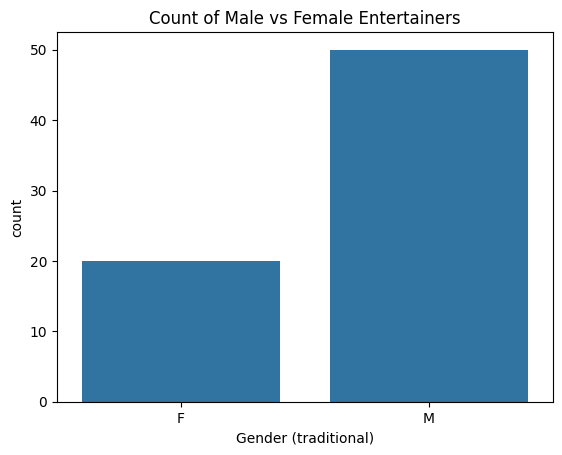

In [12]:
#Gender wise count of entertainers
sns.countplot(x='Gender (traditional)',data=df)
plt.title('Count of Male vs Female Entertainers')
plt.show()

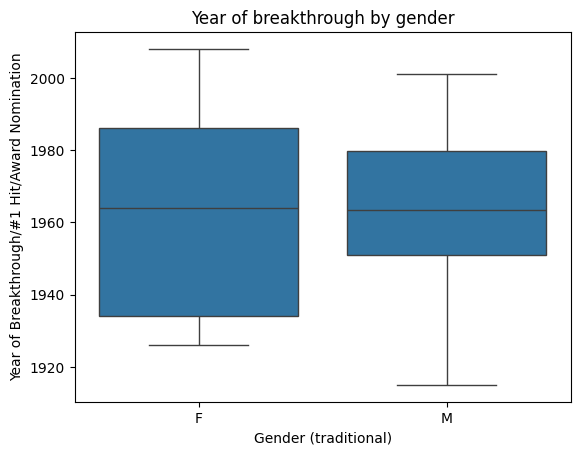

In [13]:
#Distribution of breakthrough year by gender
sns.boxplot(x='Gender (traditional)',y='Year of Breakthrough/#1 Hit/Award Nomination',data=df)
plt.title('Year of breakthrough by gender')
plt.show()

In [ ]:
##AGE ANALYSIS##

In [15]:
df['age_of_breakthrough']=df['Year of Breakthrough/#1 Hit/Award Nomination']-df['Birth Year']
df['age_at_first_award']=df[ 'Year of First Oscar/Grammy/Emmy']-df['Birth Year']
df['age_at_last_work']=df['Year of Last Major Work (arguable)']-df['Birth Year']

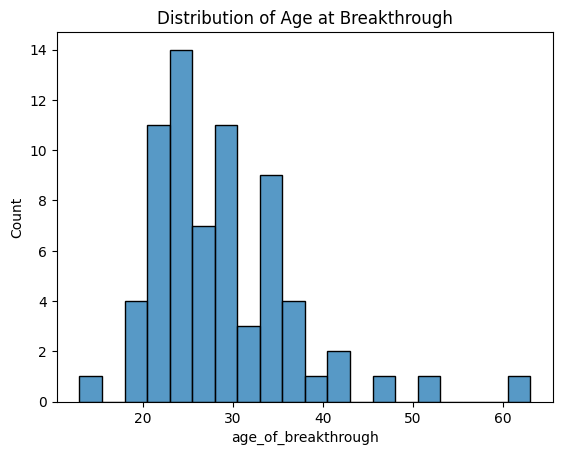

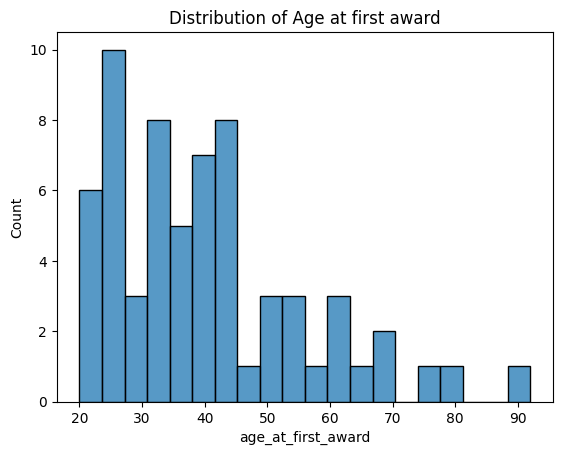

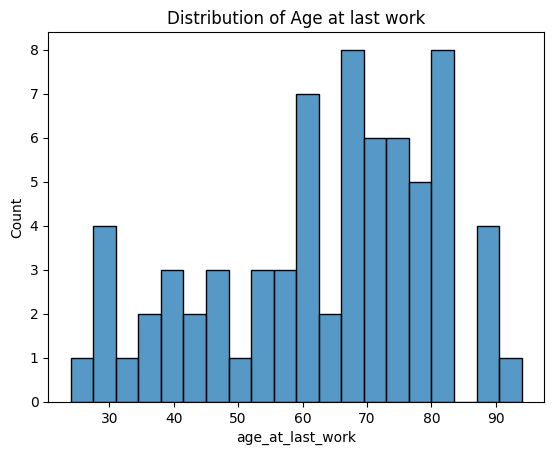

In [16]:
sns.histplot(df['age_of_breakthrough'],bins=20)
plt.title('Distribution of Age at Breakthrough')
plt.show()

sns.histplot(df['age_at_first_award'],bins=20)
plt.title('Distribution of Age at first award')
plt.show()

sns.histplot(df['age_at_last_work'],bins=20)
plt.title('Distribution of Age at last work')
plt.show()

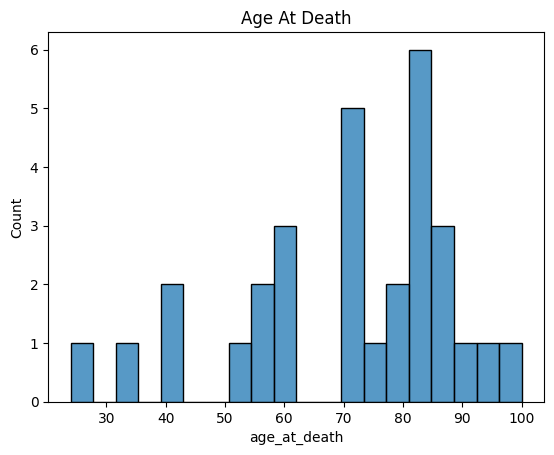

In [22]:
df=df[pd.to_numeric(df['Year of Death'],errors='coerce').notna()]
df.loc[:,'age_at_death']=df['Year of Death']-df['Birth Year']
sns.histplot(df['age_at_death'],bins=20)
plt.title('Age At Death')
plt.show()

In [21]:
df.to_excel('entertainment.xlsx')